In [392]:
import pandas as pd

In [393]:
df1 = pd.read_csv('LAGOS_crosschecked.csv')

In [394]:
df2 = pd.read_csv('polling-units.csv')

In [395]:
df1.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-001,"ST. JOSEPH SECONDARY SCHOOL, MANGORO",120,744,True,-1,False,True,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,False,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,True,False,False,UNKNOWN,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,True,False,False,UNKNOWN,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,False,False,False,UNKNOWN,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


In [396]:
df2.head()

,PU-Name,Ward,LGA,State,location.latitude,location.longitude
0,"LGEA SCHOOL INABE, INABE/EFOJA",OLAMABORO V,OLAMABORO,KOGI,7.178359,7.577163
1,"LGEA SCHOOL INELE, UGO I & II",OLAMABORO V,OLAMABORO,KOGI,43.469120,-80.575699
2,"UNOBE MKT. SQUARE, UNOBE",OLAMABORO V,OLAMABORO,KOGI,7.222232,7.565029
3,"LGEA SCHOOL UGOJOUALE, UGOJO UBALU",OLAMABORO V,OLAMABORO,KOGI,7.178359,7.577163
4,"OPEN SPACE, UKPOKIDO",OLAMABORO V,OLAMABORO,KOGI,7.222232,7.565029


In [397]:
print(df1.columns)
print(df2.columns)


Index(['State', 'LGA', 'Ward', 'PU-Code', 'PU-Name', 'Accredited_Voters',
       'Registered_Voters', 'Results_Found', 'Transcription_Count',
       'Result_Sheet_Stamped', 'Result_Sheet_Corrected',
       'Result_Sheet_Invalid', 'Result_Sheet_Unclear', 'Result_Sheet_Unsigned',
       'APC', 'LP', 'PDP', 'NNPP', 'Results_File'],
      dtype='object')
Index(['PU-Name', 'Ward', 'LGA', 'State', 'location.latitude',
       'location.longitude'],
      dtype='object')


In [398]:
merged_df = pd.merge(df1, df2, on=['State', 'LGA', 'Ward', 'PU-Name'], how='inner')

In [399]:
merged_df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-001,"ST. JOSEPH SECONDARY SCHOOL, MANGORO",120,744,True,-1,False,...,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,NaN,NaN
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,False,False,UNKNOWN,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.610059,3.327579
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,False,False,UNKNOWN,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.609893,3.327540
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,False,False,UNKNOWN,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041


In [400]:
df = merged_df.dropna(subset=['location.latitude', 'location.longitude'])

In [401]:
df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,False,False,UNKNOWN,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.610059,3.327579
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,False,False,UNKNOWN,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.609893,3.327540
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,False,False,UNKNOWN,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041
5,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-007,KAMORU ALIMI/SEBIOTIMO STREET I,128,676,True,-1,False,...,False,False,UNKNOWN,77,19,7,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041


In [402]:
merged_df.shape

(10234, 21)

In [403]:
df.shape
# generating a link for the csv file with added longitutude and latitude for each polling unit 
transformed_csv_path = 'LAGOS_longlatname.csv'
df.to_csv(transformed_csv_path, index=False)
import pandas as pd
from IPython.display import FileLink
display(FileLink(transformed_csv_path))

C:\Users\HP\LAGOS_longlatname.csv

In [404]:
party_columns = ['APC', 'LP', 'PDP', 'NNPP']

In [405]:
df_parties = df[party_columns]

In [406]:
# Calculate the correlation matrix

In [407]:
correlation_matrix = df_parties.corr()

In [408]:
# Create a heatmap using Seaborn

In [409]:
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

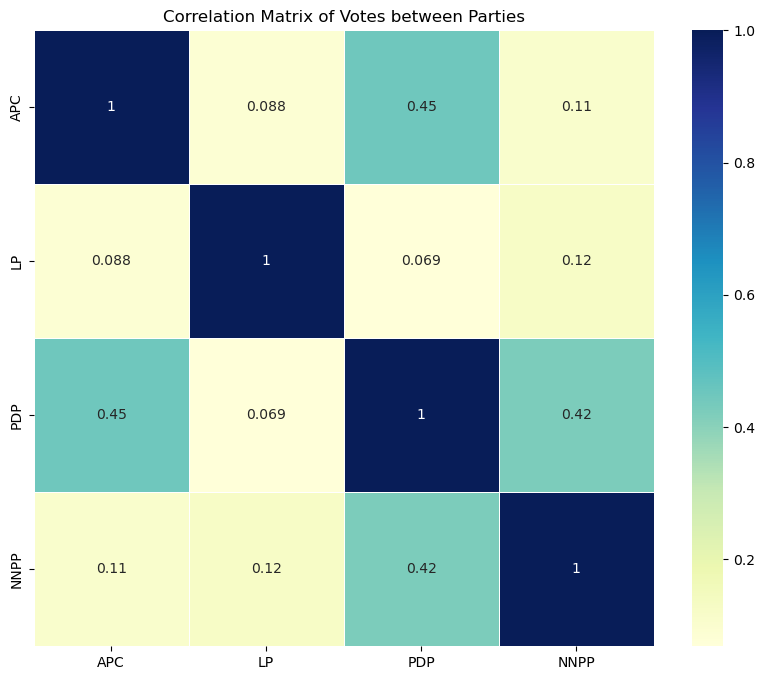

In [411]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix of Votes between Parties')
plt.show()

In [412]:
party_columns = ['APC', 'LP', 'PDP', 'NNPP']

In [413]:
df_parties = df[party_columns]

In [414]:
# Created pairwise scatter plots using Seaborn

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


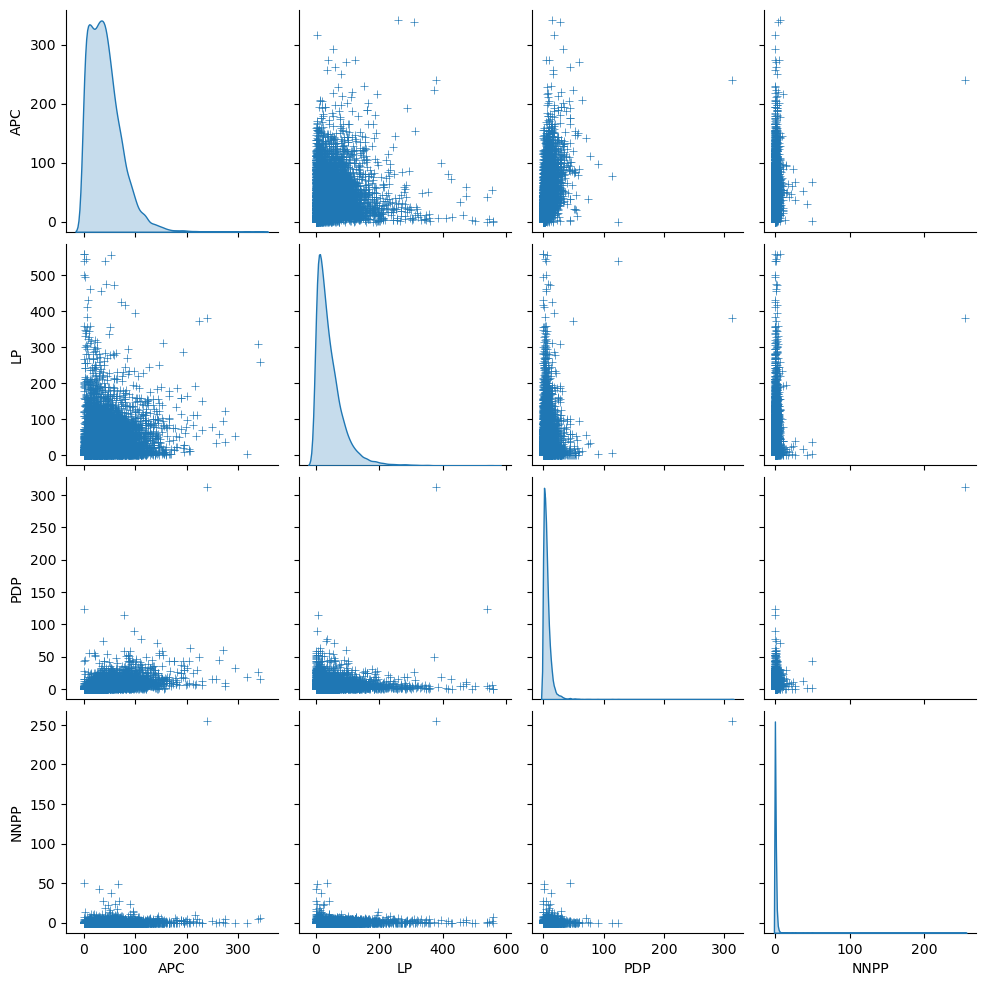

In [415]:
sns.pairplot(df_parties, diag_kind='kde', markers='+')

In [416]:
plt.suptitle('Pairwise Scatter Plots of Votes between Parties', y=1.02)

Text(0.5, 1.02, 'Pairwise Scatter Plots of Votes between Parties')

<Figure size 640x480 with 0 Axes>

In [417]:
plt.show()

In [418]:
party_columns = ['APC', 'LP', 'PDP', 'NNPP']

In [419]:
df_parties = df[party_columns]

In [420]:
# Melt the dataframe to have a long-form DataFrame suitable for boxplot

In [421]:
df_melted = df_parties.melt(var_name='Party', value_name='Votes')

In [422]:
# Create boxplots using Seaborn

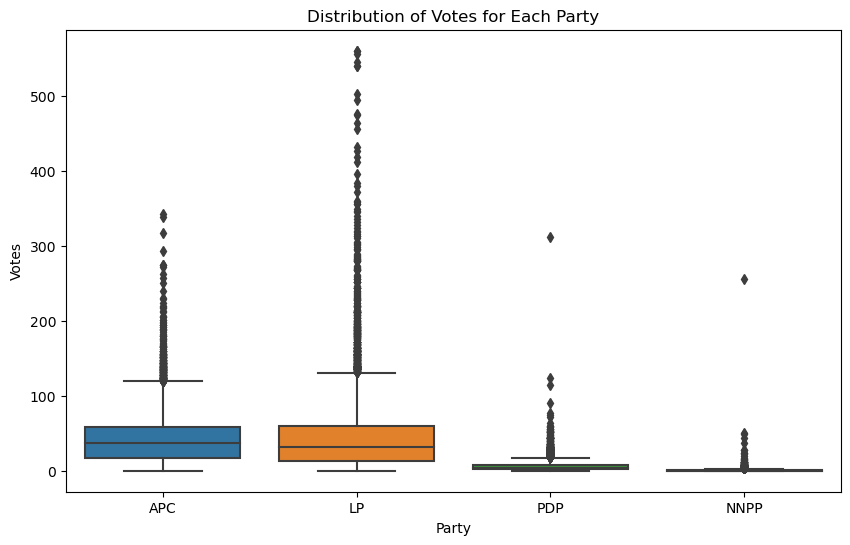

In [423]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Party', y='Votes', data=df_melted)
plt.title('Distribution of Votes for Each Party')
plt.xlabel('Party')
plt.ylabel('Votes')
plt.show()

In [424]:
party_columns = ['APC', 'LP', 'PDP', 'NNPP']

In [425]:
df_parties = df[party_columns]

In [426]:
# Created a scatter plot with different colors for each party

In [427]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

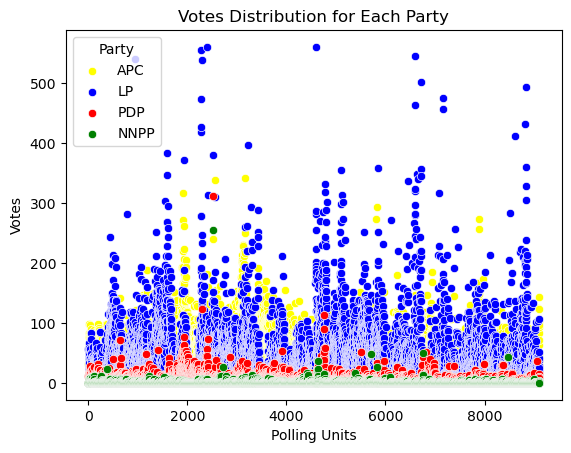

In [428]:
colors = ['yellow', 'blue', 'red', 'green']
for i, party in enumerate(party_columns):
    sns.scatterplot(data=df_parties, x=range(len(df_parties)), y=party, label=party, color=colors[i])

plt.title('Votes Distribution for Each Party')
plt.xlabel('Polling Units')
plt.ylabel('Votes')
plt.legend(title='Party')
plt.show()

In [429]:
!pip install geopy

In [430]:
from geopy.distance import geodesic

In [431]:
required_columns = ['State', 'LGA', 'Ward', 'PU-Code', 'PU-Name', 'Accredited_Voters', 'Registered_Voters',
                    'Results_Found', 'Transcription_Count', 'Result_Sheet_Stamped', 'Result_Sheet_Corrected',
                    'Result_Sheet_Invalid', 'Result_Sheet_Unclear', 'Result_Sheet_Unsigned', 'APC', 'LP',
                    'PDP', 'NNPP', 'Results_File', 'location.latitude', 'location.longitude']

In [432]:
# Verified if the required columns are present in the DataFrame

In [433]:
if not all(column in df.columns for column in required_columns):
    raise ValueError("One or more required columns are missing from the dataset")

In [434]:
df = df[required_columns]

In [435]:
import numpy as np 

In [436]:
from sklearn.neighbors import BallTree

In [437]:
def find_neighbors(df, radius=1.0):
    # Convert latitude and longitude to radians
    df['latitude_rad'] = np.radians(df['location.latitude'])
    df['longitude_rad'] = np.radians(df['location.longitude'])

    # Combine latitude and longitude into an array
    coords = np.vstack((df['latitude_rad'], df['longitude_rad'])).T

    # Create a BallTree for efficient neighbor searching
    tree = BallTree(coords, metric='haversine')

    # Radius needs to be converted to radians (Earth radius in kilometers)
    radius_in_radians = radius / 6371.0

    neighbors = []
    for i in range(len(df)):
        # Find neighbors within the radius
        indices = tree.query_radius([coords[i]], r=radius_in_radians)[0]
        # Exclude the point itself from the neighbors
        row_neighbors = [idx for idx in indices if idx != i]
        neighbors.append(row_neighbors)

    return neighbors

In [438]:
df['neighbors'] = find_neighbors(df)

In [439]:
#displaying the dataframe with neighbours

In [440]:
df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude,latitude_rad,longitude_rad,neighbors
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618,0.115396,0.058078,"[12, 13, 6229, 7311, 5997, 6012, 22, 25, 6014,..."
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.610059,3.327579,0.115367,0.058077,"[2771, 12, 13, 6229, 7311, 5997, 6012, 22, 25,..."
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.609893,3.327540,0.115364,0.058077,"[2771, 12, 13, 6229, 7311, 5997, 6012, 22, 25,..."
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041,0.115436,0.058033,"[12, 13, 6229, 7311, 5997, 43, 5996, 5992, 60,..."
5,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-007,KAMORU ALIMI/SEBIOTIMO STREET I,128,676,True,-1,False,...,77,19,7,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041,0.115436,0.058033,"[12, 13, 6229, 7311, 5997, 43, 5996, 5992, 60,..."


In [441]:
from scipy.spatial import cKDTree
import numpy as np

In [442]:
df = df[required_columns]

In [443]:
# Convert latitude and longitude to radians for accurate distance calculations
df['latitude_rad'] = np.radians(df['location.latitude'])
df['longitude_rad'] = np.radians(df['location.longitude'])

In [444]:
# Create a KDTree for fast spatial queries
coords = df[['latitude_rad', 'longitude_rad']].values
tree = cKDTree(coords)

In [445]:
# Define the radius in kilometers (Earth radius is approximately 6371 km)
radius_km = 1.0
radius_rad = radius_km / 6371.0

In [446]:
# Find neighbors within the radius
def find_neighbors_optimized(tree, coords, radius_rad):
    neighbors = []
    for i, coord in enumerate(coords):
        indices = tree.query_ball_point(coord, radius_rad)
        indices = [idx for idx in indices if idx != i]  # Exclude self from neighbors
        neighbors.append(indices)
    return neighbors

df['neighbors'] = find_neighbors_optimized(tree, coords, radius_rad)

In [447]:
# Drop the temporary radian columns
df.drop(columns=['latitude_rad', 'longitude_rad'], inplace=True)

In [448]:
# Function to map indices to polling unit names
def map_neighbors_to_names(df, neighbors_column='neighbors', name_column='PU-Name'):
    neighbors_names = []
    for neighbors in df[neighbors_column]:
        names = df.iloc[neighbors][name_column].tolist()
        neighbors_names.append(names)
    return neighbors_names

In [449]:
# Add a new column with the names of the neighboring polling units
df['neighbor_names'] = map_neighbors_to_names(df)

In [450]:
# display the df with neighbour names
df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude,neighbors,neighbor_names
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618,"[7311, 12, 5997, 6229, 13, 22, 6012, 15, 28, 2...","[JUNC. OF ODEGBAMI STR./ ABEOKUTA EXP.WAY, 4, ..."
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,UNKNOWN,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.610059,3.327579,"[2771, 7311, 12, 5997, 6229, 13, 22, 6012, 15,...","[IN FRONT OF NO. 10 EGBA ST. I, JUNC. OF ODEGB..."
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,UNKNOWN,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.609893,3.327540,"[2771, 7311, 12, 5997, 6229, 13, 22, 6012, 15,...","[IN FRONT OF NO. 10 EGBA ST. I, JUNC. OF ODEGB..."
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,UNKNOWN,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041,"[7311, 43, 12, 60, 104, 101, 5992, 5996, 26, 5...","[JUNC. OF ODEGBAMI STR./ ABEOKUTA EXP.WAY, 28,..."
5,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-007,KAMORU ALIMI/SEBIOTIMO STREET I,128,676,True,-1,False,...,UNKNOWN,77,19,7,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041,"[7311, 43, 12, 60, 104, 101, 5992, 5996, 26, 5...","[JUNC. OF ODEGBAMI STR./ ABEOKUTA EXP.WAY, 28,..."


In [451]:
party_columns = ['APC', 'LP', 'PDP', 'NNPP']

In [452]:
# Function to calculate the average votes of neighbors
def calculate_average_votes(df, neighbors_column, party_columns):
    for party in party_columns:
        avg_votes = []
        for neighbors in df[neighbors_column]:
            if neighbors:  # Check if neighbors list is not empty
                avg_vote = df.iloc[neighbors][party].mean()
            else:
                avg_vote = np.nan
            avg_votes.append(avg_vote)
        df[f'{party}_avg_votes'] = avg_votes
    return df

In [453]:
# Add average votes of neighbors to the DataFrame
df = calculate_average_votes(df, 'neighbors', party_columns)

In [454]:
# Function to calculate outlier scores
def calculate_outlier_scores(df, party_columns):
    for party in party_columns:
        df[f'{party}_outlier_score'] = abs(df[party] - df[f'{party}_avg_votes'])
    return df

In [455]:
# Add outlier scores to the DataFrame
df = calculate_outlier_scores(df, party_columns)

In [456]:
# df with outliers score
df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,neighbors,neighbor_names,APC_avg_votes,LP_avg_votes,PDP_avg_votes,NNPP_avg_votes,APC_outlier_score,LP_outlier_score,PDP_outlier_score,NNPP_outlier_score
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,"[7311, 12, 5997, 6229, 13, 22, 6012, 15, 28, 2...","[JUNC. OF ODEGBAMI STR./ ABEOKUTA EXP.WAY, 4, ...",43.078947,24.421053,6.789474,1.263158,43.078947,24.421053,6.789474,1.263158
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,"[2771, 7311, 12, 5997, 6229, 13, 22, 6012, 15,...","[IN FRONT OF NO. 10 EGBA ST. I, JUNC. OF ODEGB...",45.229508,29.770492,6.557377,1.163934,14.229508,27.229508,4.442623,1.163934
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,"[2771, 7311, 12, 5997, 6229, 13, 22, 6012, 15,...","[IN FRONT OF NO. 10 EGBA ST. I, JUNC. OF ODEGB...",46.300000,32.866667,6.566667,1.150000,18.300000,33.133333,1.566667,0.150000
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,"[7311, 43, 12, 60, 104, 101, 5992, 5996, 26, 5...","[JUNC. OF ODEGBAMI STR./ ABEOKUTA EXP.WAY, 28,...",41.534483,21.422414,7.155172,1.465517,17.534483,6.577586,8.844828,0.465517
5,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-007,KAMORU ALIMI/SEBIOTIMO STREET I,128,676,True,-1,False,...,"[7311, 43, 12, 60, 104, 101, 5992, 5996, 26, 5...","[JUNC. OF ODEGBAMI STR./ ABEOKUTA EXP.WAY, 28,...",41.077586,21.500000,7.232759,1.474138,35.922414,2.500000,0.232759,1.474138


In [457]:
# Sorting the dataset by outlier scores for each party and store in a dictionary
sorted_dfs = {party: df.sort_values(by=f'{party}_outlier_score', ascending=False) for party in party_columns}

In [458]:
# Display the sorted DataFrame for APC
sorted_dfs['APC'].head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,neighbors,neighbor_names,APC_avg_votes,LP_avg_votes,PDP_avg_votes,NNPP_avg_votes,APC_outlier_score,LP_outlier_score,PDP_outlier_score,NNPP_outlier_score
2759,LAGOS,IFAKO-IJAYE,IJU-OBAWOLE,24-10-06-008,OGUNDIMU PRY. SCH.,700,8522,True,-1,False,...,"[6089, 317, 6087, 316, 6086, 6081, 2452, 2453,...","[12 EMMANUEL ADEKANBI STR, 13, ADEMOLU STREET,...",41.575758,37.196970,4.681818,0.515152,296.424242,272.803030,22.318182,3.484848
3431,LAGOS,IKORODU,ERIKORODU,24-12-17-003,JUNCTION OF ERUWEN/ERUWEN EKITI VILLAGE,634,2070,True,-1,False,...,"[7929, 7795, 2994, 7859, 3079, 2971, 3003, 303...",[OPPOSITE GRA I GATE - OPEN SPACE IN FRONT OF...,54.581818,19.054545,6.072727,0.327273,287.418182,240.945455,8.927273,5.672727
6693,LAGOS,SURULERE,IPONRI HOUSING ESTATE/ERIC MOORE,24-20-09-020,BOOTH AT BLOCK NO. 13,139,677,True,-1,False,...,"[5506, 5572, 9042, 5519, 9038, 5507, 9043, 904...","[JUNCTION OF DISU-ESAN ST. I, KEHINDE ST. BY H...",43.076923,60.256410,4.384615,1.461538,249.923077,6.256410,28.615385,1.461538
2068,LAGOS,BADAGRY,APA,24-06-04-008,"INSIDE COMMUNITY HALL , GBAJI VILLAGE",343,983,True,-1,False,...,"[1894, 1893, 6971, 1860, 1861, 1970, 6847, 197...",[NEAR JOHN WHENU COMPOUND OPP OANDO PETROL STA...,76.487805,21.121951,16.902439,0.292683,240.512195,17.121951,1.097561,0.292683
6662,LAGOS,SURULERE,ADENIRAN/OGUNSANYA,24-20-08-017,"BLK. 44, ALH. MASHA ROAD",323,1154,True,-1,False,...,"[9035, 5915, 5893, 5911, 8984, 5615, 5932, 594...","[JUNCTION OF OLAITAN ODULARU ST./IDOWU ST., ID...",41.601562,67.546875,3.703125,0.679688,232.398438,30.546875,1.296875,0.679688


In [475]:
sorted_dfs['APC'].to_excel('sorted_APC.xlsx', index=False)
'sorted_APC.xlsx'
# generating a link for the excel file with sorted list of polling units by outlier scores for each party

transformed_excel_path = 'sorted_APC.xlsx'
df.to_excel(transformed_excel_path, index=False)
import pandas as pd
from IPython.display import FileLink
display(FileLink(transformed_excel_path))

C:\Users\HP\sorted_APC.xlsx

In [476]:
# Define the number of top outliers to highlight
top_n = 3

In [477]:
# Get the top N outliers for each party and store in a dictionary
top_outliers = {party: sorted_dfs[party].head(top_n) for party in party_columns}

In [483]:
# Display the top outliers for one party (e.g., 'APC')
top_outliers['NNPP']

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,neighbors,neighbor_names,APC_avg_votes,LP_avg_votes,PDP_avg_votes,NNPP_avg_votes,APC_outlier_score,LP_outlier_score,PDP_outlier_score,NNPP_outlier_score
2712,LAGOS,IFAKO-IJAYE,FAGBA/AKUTE ROAD,24-10-04-010,"1, ALH. GANIYU ST. IJU I",148,715,True,-1,False,...,"[7513, 7515, 2435, 2504, 2503, 5240, 5241, 127...","[JUNC. OF ADEFOLABI/OLUSOLA OLAWALE STR., JUNC...",52.119048,42.630952,5.488095,0.226190,187.880952,337.369048,306.511905,254.773810
7713,LAGOS,APAPA,APAPA II (LIVERPOOL RD. AND ENVIRONS),24-05-02-013,"BESIDE AZARE CRESCENT, LIVERPOOL",32,80,True,-1,False,...,"[1680, 6747, 6746, 1677, 6782, 1679, 6750, 676...","[PARK LANE, 11A SHOSILVA, JUNCTION OF FREETOWN...",19.155172,27.189655,7.879310,1.396552,18.155172,8.810345,36.120690,48.603448
6563,LAGOS,SURULERE,YABA/OJUELEGBA,24-20-05-019,"NATHAN PRY. SCHOOL, SURULERE II",141,726,True,-1,False,...,"[5520, 5737, 5731, 5732, 4518, 5727, 5734, 571...","[OSEMEKA ST. BY HOUSE NO. 24, SURULERE PRY. SC...",45.835294,50.576471,3.964706,0.411765,21.164706,46.576471,2.964706,48.588235


In [484]:
top_outliers['NNPP'].to_csv('sorted_NNPP_top3.csv', index = False)

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

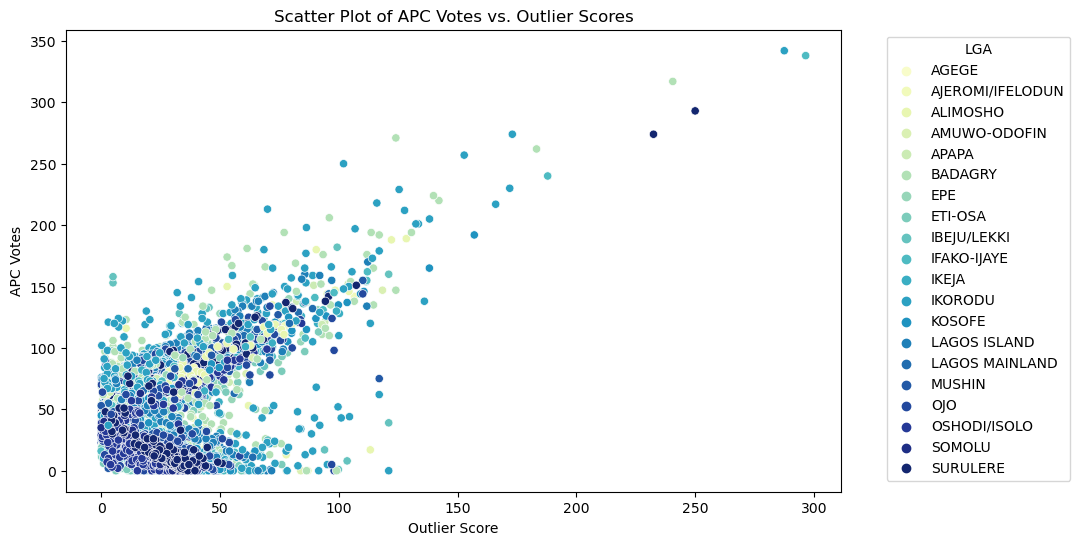

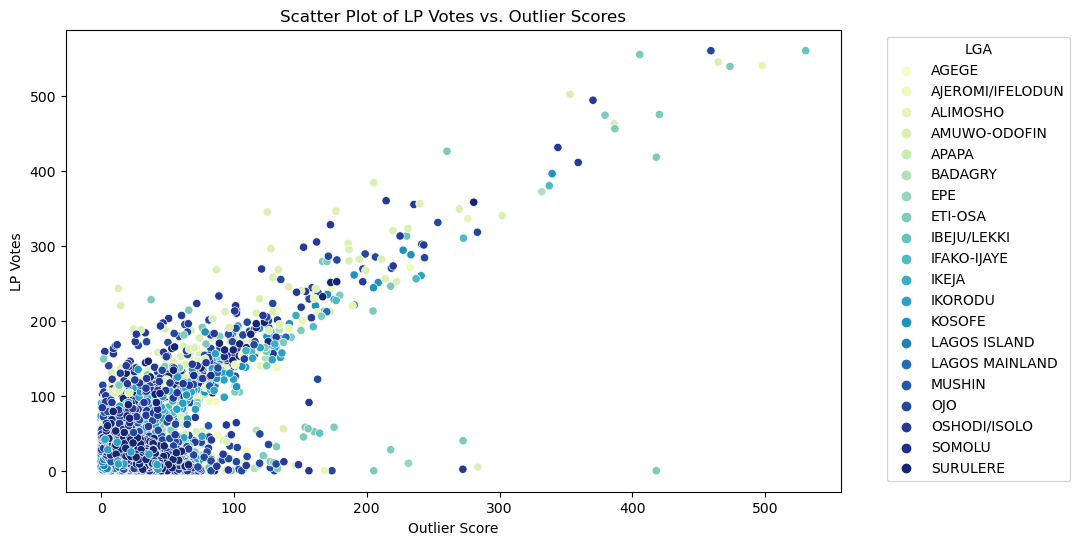

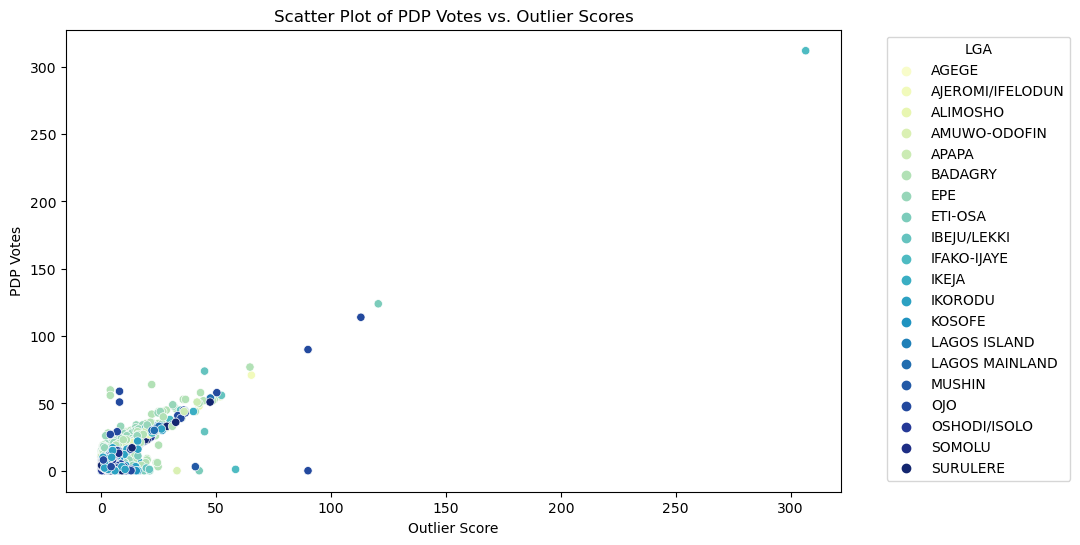

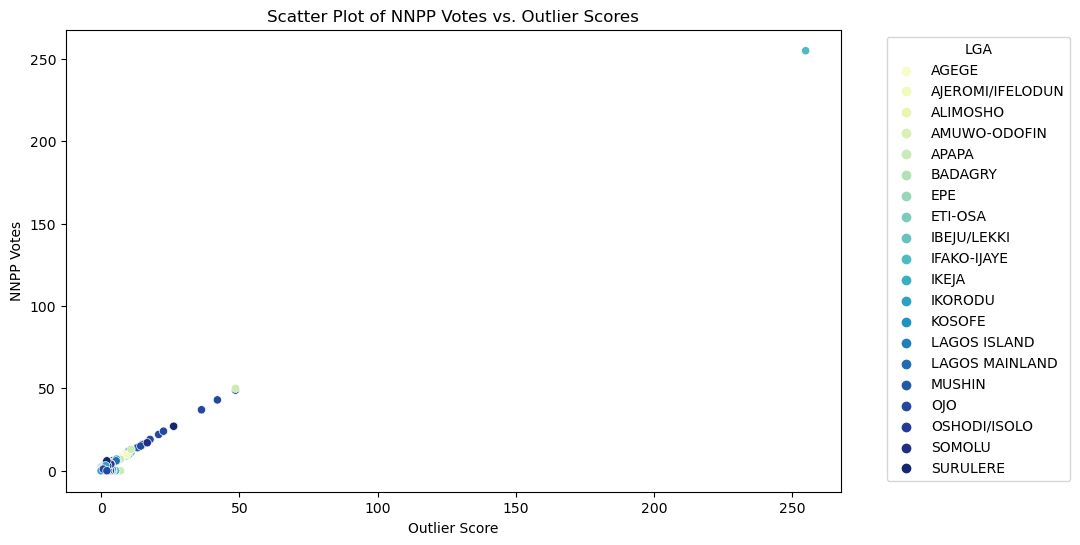

In [481]:
# Scatter plot of outlier scores for each party
for party in party_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=f'{party}_outlier_score', y=party, hue='LGA', palette='YlGnBu')
    plt.title(f'Scatter Plot of {party} Votes vs. Outlier Scores')
    plt.xlabel('Outlier Score')
    plt.ylabel(f'{party} Votes')
    plt.legend(title='LGA', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

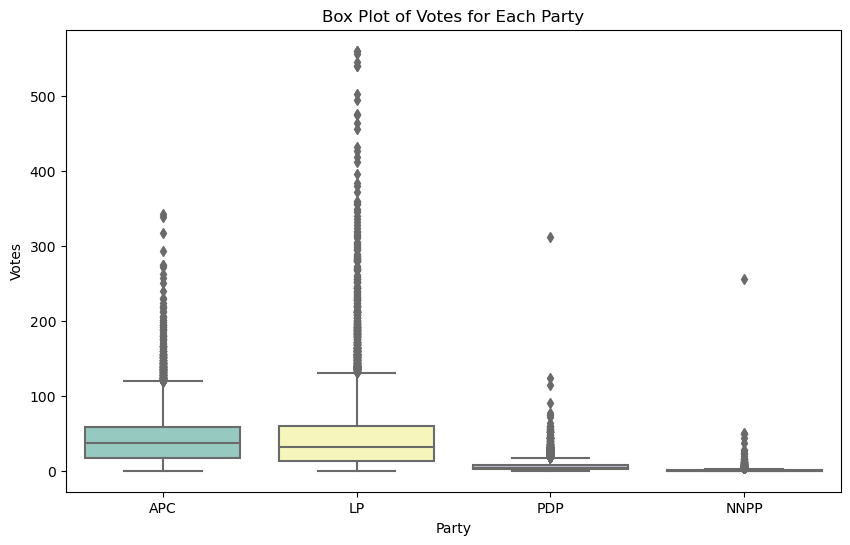

In [482]:
# Box plot of outlier scores for each party
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[party_columns], palette='Set3')
plt.title('Box Plot of Votes for Each Party')
plt.xlabel('Party')
plt.ylabel('Votes')
plt.show()